# Upper Confidence Bound (UCB)

## Importing the libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

## Importing the dataset

In [8]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [9]:
import math
"""
Multi armed bandit problem:
Determine the best distrobution between a few slog machines by spending least amount of time

Deterministic Algorithm (same result)
UCB
step 1:
come up with a large confidence bound in the fst few runs
draw a prediction line in the middle of the boundary (average)

step 2:
looking at largest confidence bound
shrink the confidence interval (converge)
repeat until the confidence bound shrink to a certain size
"""

N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
  ad = 0
  max_upper_bound = 0
  for i in range(0, d):
    if (numbers_of_selections[i] > 0):
      average_reward = sums_of_rewards[i] / numbers_of_selections[i]
      delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400 # inf
    if (upper_bound > max_upper_bound):
      max_upper_bound = upper_bound
      ad = i
  ads_selected.append(ad)
  numbers_of_selections[ad] = numbers_of_selections[ad] + 1
  reward = dataset.values[n, ad]
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward
  total_reward = total_reward + reward

In [12]:
print(dataset.values)

[[1 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 1 0 0]
 [0 1 0 ... 0 0 0]]


## Visualising the results

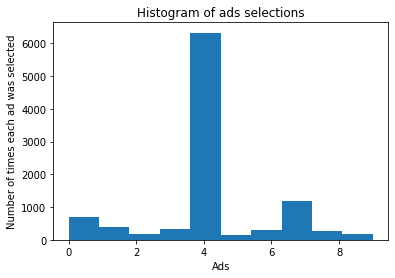

In [11]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()